<a href="https://colab.research.google.com/github/nachomendoza97/Data-Industrial/blob/main/Proyecto_3_AnalisisABC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- VERIFICACIÓN DE CABECERA ---
        sku  valor_consumo  %_acum_items categoria
0  ITEM-040  810118.496446          0.02         A
1  ITEM-050  474980.174927          0.04         A
2  ITEM-007  209619.662382          0.06         A
3  ITEM-044  149880.591137          0.08         A
4  ITEM-021  140976.414581          0.10         A

--- DISTRIBUCIÓN DE ITEMS ---
categoria
A    10
B    17
C    23
Name: count, dtype: int64


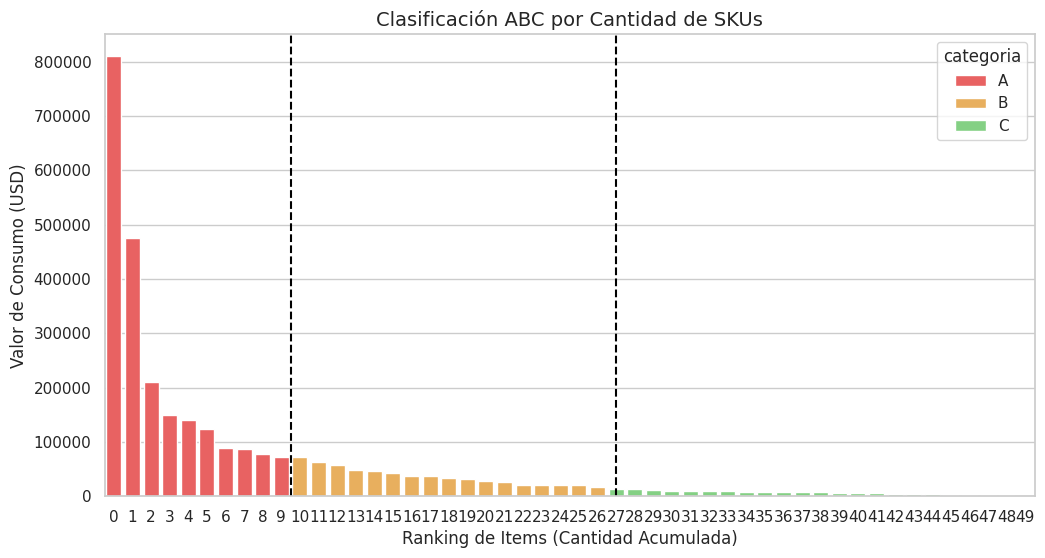

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. GENERACIÓN DE DATOS (Aseguramos que df exista)
n_items = 50
data = {
    'sku': [f'ITEM-{i+1:03d}' for i in range(n_items)],
    'valor_consumo': np.random.lognormal(mean=10, sigma=1.5, size=n_items)
}
df = pd.DataFrame(data)

# 2. ORDENAR POR VALOR (Importante para el ranking)
df = df.sort_values('valor_consumo', ascending=False).reset_index(drop=True)

# 3. CLASIFICACIÓN POR % DE ITEMS (20% A, 35% B, 45% C)
# Calculamos la posición relativa de cada item (1/50, 2/50...)
df['%_acum_items'] = (df.index + 1) / len(df)

def clasificar_por_items(p):
    if p <= 0.20: return 'A'
    elif p <= 0.55: return 'B' # 20% + 35% = 55%
    else: return 'C'

df['categoria'] = df['%_acum_items'].apply(clasificar_por_items)

# 4. VISUALIZACIÓN DE RESULTADOS
print("--- VERIFICACIÓN DE CABECERA ---")
print(df.head()) # Ahora debería reconocerlo perfectamente

print("\n--- DISTRIBUCIÓN DE ITEMS ---")
print(df['categoria'].value_counts().sort_index())

# 5. GRÁFICO PROFESIONAL PARA TU PORTAFOLIO
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
colores = {'A': '#ff4b4b', 'B': '#ffb347', 'C': '#77dd77'}

sns.barplot(x=df.index, y='valor_consumo', hue='categoria', data=df, dodge=False, palette=colores)
plt.axvline(x=len(df)*0.20 - 0.5, color='black', linestyle='--')
plt.axvline(x=len(df)*0.55 - 0.5, color='black', linestyle='--')

plt.title('Clasificación ABC por Cantidad de SKUs', fontsize=14)
plt.xlabel('Ranking de Items (Cantidad Acumulada)')
plt.ylabel('Valor de Consumo (USD)')
plt.show()